## Assignment - High Frequency Words
#### Summer 2021
**Authors:** GOAT Team (Esteban Aramayo, Ethan Haley, Claire Meyer, and Tyler Frankenburg)

**What follows is an analysis of the distribution of wordcounts in the Project Gutenberg eBook version of "Don Quijote", by Miguel de Cervantes Saavedra.**

In [71]:
import nltk, re, pprint
from urllib import request
from nltk import word_tokenize
import matplotlib.pyplot as plt

Start by accessing the UTF-8 version of the text on Project Gutenberg's website.

In [5]:
url = 'https://gutenberg.org/files/2000/2000-0.txt'
response = request.urlopen(url)
raw = response.read().decode('utf8')
type(raw)

str

In [6]:
len(raw)

2168460

In [7]:
raw[:99]

'\ufeffThe Project Gutenberg eBook of Don Quijote, by Miguel de Cervantes Saavedra\r\n\r\nThis eBook is for t'

In [8]:
# Break the raw string into tokens
tokens = word_tokenize(raw)
len(tokens)

447847

In [26]:
print(tokens[1100:1111])

['con', 'su', 'ama', ',', 'y', 'es', 'uno', 'de', 'los', 'importantes', 'capítulos']


Remove the header and footer around the book text

In [25]:
start = tokens.index('El')
print(tokens[start:start+11])

['El', 'ingenioso', 'hidalgo', 'don', 'Quijote', 'de', 'la', 'Mancha', 'por', 'Miguel', 'de']


In [17]:
end = tokens[::-1].index('Fin')
tokens[-11-end:-end]

['caer', 'del', 'todo', ',', 'sin', 'duda', 'alguna', '.', 'Vale', '.', 'Fin']

In [18]:
tokens = tokens[start:-end]

In [19]:
text = nltk.Text(tokens)

In [41]:
print(text[-11:])

['caer', 'del', 'todo', ',', 'sin', 'duda', 'alguna', '.', 'Vale', '.', 'Fin']


In [28]:
from collections import Counter

In [36]:
wordcounts = Counter([str.lower(t) for t in text]) 

In [43]:
print(wordcounts.most_common(200))

[(',', 40277), ('que', 20727), ('de', 18392), ('y', 18242), ('la', 10490), ('a', 9854), ('en', 8267), ('el', 8262), ('.', 7972), ('no', 6235), (';', 4802), ('los', 4766), ('se', 4752), ('con', 4265), ('por', 3899), ('lo', 3489), ('las', 3482), ('le', 3407), ('su', 3388), ('—', 2988), ('don', 2714), ('del', 2536), ('me', 2344), ('como', 2260), ('es', 2112), ('yo', 2060), ('más', 2055), (':', 2047), ('si', 1957), ('un', 1942), ('al', 1753), ('quijote', 1719), ('mi', 1701), ('sancho', 1667), ('para', 1448), ('porque', 1391), ('ni', 1375), ('una', 1334), ('él', 1274), ('tan', 1233), ('o', 1215), ('todo', 1179), ('sin', 1156), ('señor', 1064), ('así', 1060), ('ser', 1059), ('sus', 1051), ('ha', 1049), ('bien', 1041), ('había', 1035), ('pero', 1015), ('?', 960), ('dijo', 933), ('merced', 900), ('esto', 884), ('—dijo', 874), ('pues', 853), ('vuestra', 851), ('todos', 818), ('—respondió', 803), ('ya', 778), ('cuando', 758), ('era', 753), ('te', 726), ('donde', 721), ('cual', 704), ('sino', 694

Make sure the accents aren't getting lost in translation.

In [64]:
print(wordcounts["él"], wordcounts["el"])

1282 8263


Remove those long dashes, whatever they are, and also the question marks attached to the words

In [56]:
'sancho—'.strip('—¿?')

'sancho'

In [63]:
wordcounts = Counter([str.lower(t).strip('—¿?') for t in text])

Now remove punctuation

In [66]:
for word in list(wordcounts): # need list for stability during iteration
    if not str.isalpha(word):
        del wordcounts[word]

In [68]:
wordcounts['dijo']  # before: ('dijo', 933), ('—dijo', 874)

1808

In [69]:
print(wordcounts.most_common(200))

[('que', 20761), ('de', 18408), ('y', 18268), ('la', 10492), ('a', 9866), ('en', 8279), ('el', 8263), ('no', 6321), ('los', 4766), ('se', 4752), ('con', 4274), ('por', 3937), ('lo', 3491), ('las', 3484), ('le', 3419), ('su', 3388), ('don', 2714), ('del', 2536), ('me', 2344), ('como', 2268), ('quijote', 2241), ('sancho', 2174), ('es', 2143), ('yo', 2069), ('más', 2055), ('si', 1964), ('un', 1943), ('dijo', 1808), ('al', 1754), ('mi', 1702), ('para', 1460), ('porque', 1392), ('ni', 1376), ('una', 1334), ('él', 1282), ('tan', 1240), ('o', 1217), ('todo', 1180), ('sin', 1156), ('señor', 1064), ('respondió', 1063), ('así', 1061), ('ser', 1059), ('ha', 1052), ('sus', 1051), ('bien', 1043), ('había', 1036), ('pero', 1015), ('merced', 900), ('esto', 886), ('pues', 857), ('vuestra', 851), ('qué', 835), ('todos', 818), ('ya', 781), ('cuando', 758), ('era', 757), ('te', 726), ('donde', 721), ('cual', 704), ('sino', 694), ('dos', 684), ('caballero', 677), ('fue', 655), ('este', 643), ('esta', 630)

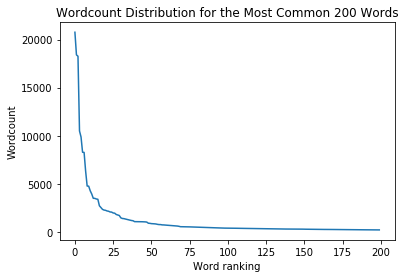

In [81]:
plt.plot(list(zip(*wordcounts.most_common(200)))[1])
plt.title("Wordcount Distribution for the Most Common 200 Words")
plt.xlabel('Word ranking')
plt.ylabel('Wordcount');

#### A numerical breakdown of the wordcounts:

In [85]:
print(f"There are {len(tokens)} words in Don Quijote, and {len(wordcounts)} unique words.")

There are 444359 words in Don Quijote, and 22826 unique words.


In [93]:
def getToX(countlist, X):
    total = 0
    numItems = 0
    gener = (tup for tup in countlist)
    while total < X:
        item = next(gener)
        numItems += 1
        total += item[1] # since we're using tuples of (word, count)
    return numItems

print(f"""The smallest number of unique words that account for half of the total words is 
      {getToX(wordcounts.most_common(200), len(tokens) / 2)}""")

The smallest number of unique words that account for half of the total words is 
      127


# TODO --  
#### Definitely looks like Zipf's law is supported by this wordcount distribution.  Need to scale the y-axis above to show "relative frequency", which maybe just means dividing by len(tokens), but shape of chart will be same regardless.